In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from tabulate import tabulate
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [2]:
# Reading data
df1 = pd.read_csv('../data/dataset.csv')
df2 = pd.read_csv('../data/TCS.BO.csv')

# Adding price column to the indicator dataset
n = df1['Date'].size
df2Close = df2['Close'].to_list()
df2Date = df2['Date'].to_list()
prices = []
for i in range(n):
    df1Date = df1['Date'].iloc[i]
    price = df2Close[df2Date.index(df1Date)]
    prices.append(price)

df1['Price'] = prices
features = df1.columns[1:-1]

# Building the final datset to be used throughout
df = pd.concat([df1['Date'],df1['Price'],df1[features]], axis=1)

In [3]:
features = ['EMV_50','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

In [4]:
def naiveBayes(nb):
    nb.fit(X_train, y_train)    # Training
    predY = nb.predict(X_test) # Generating signals over test set

    nDays = 90  # N-days for signal visualization
    # Visualizing N-days trading plan offered by the model
    fig = plt.figure(figsize=(40,30))
    plt.subplot(2,1,1)
    plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
    i = 0
    for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
        label = predY[i]
        if(label=='WAIT'): label = ''
        elif(label=='BUY'): 
            label = '{:.2f}(B)'.format(y)
            plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
            plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
        else: 
            label = '{:.2f}(S)'.format(y)
            plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
            plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
        i = i+1
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (in Rs.)')
    plt.title('90-Days Trading Plan Offered by Naive Bayes', fontsize=24, fontweight='bold')

    # Visualizing N-days trading plan offered by the original strategy
    plt.subplot(2,1,2)
    plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
    i = 0
    for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
        label = df['Signal'].iloc[i]
        if(label=='WAIT'): label = ''
        elif(label=='BUY'): 
            label = '{:.2f}(B)'.format(y)
            plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
            plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=14, fontweight='bold')
        else: 
            label = '{:.2f}(S)'.format(y)
            plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
            plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=12, fontweight='bold')
        i = i+1
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (in Rs.)')
    plt.title('90-Days Trading Plan Offered by the Original Strategy', fontsize=24, fontweight='bold')
    plt.show()

Part 1: Gaussian Naive Bayes

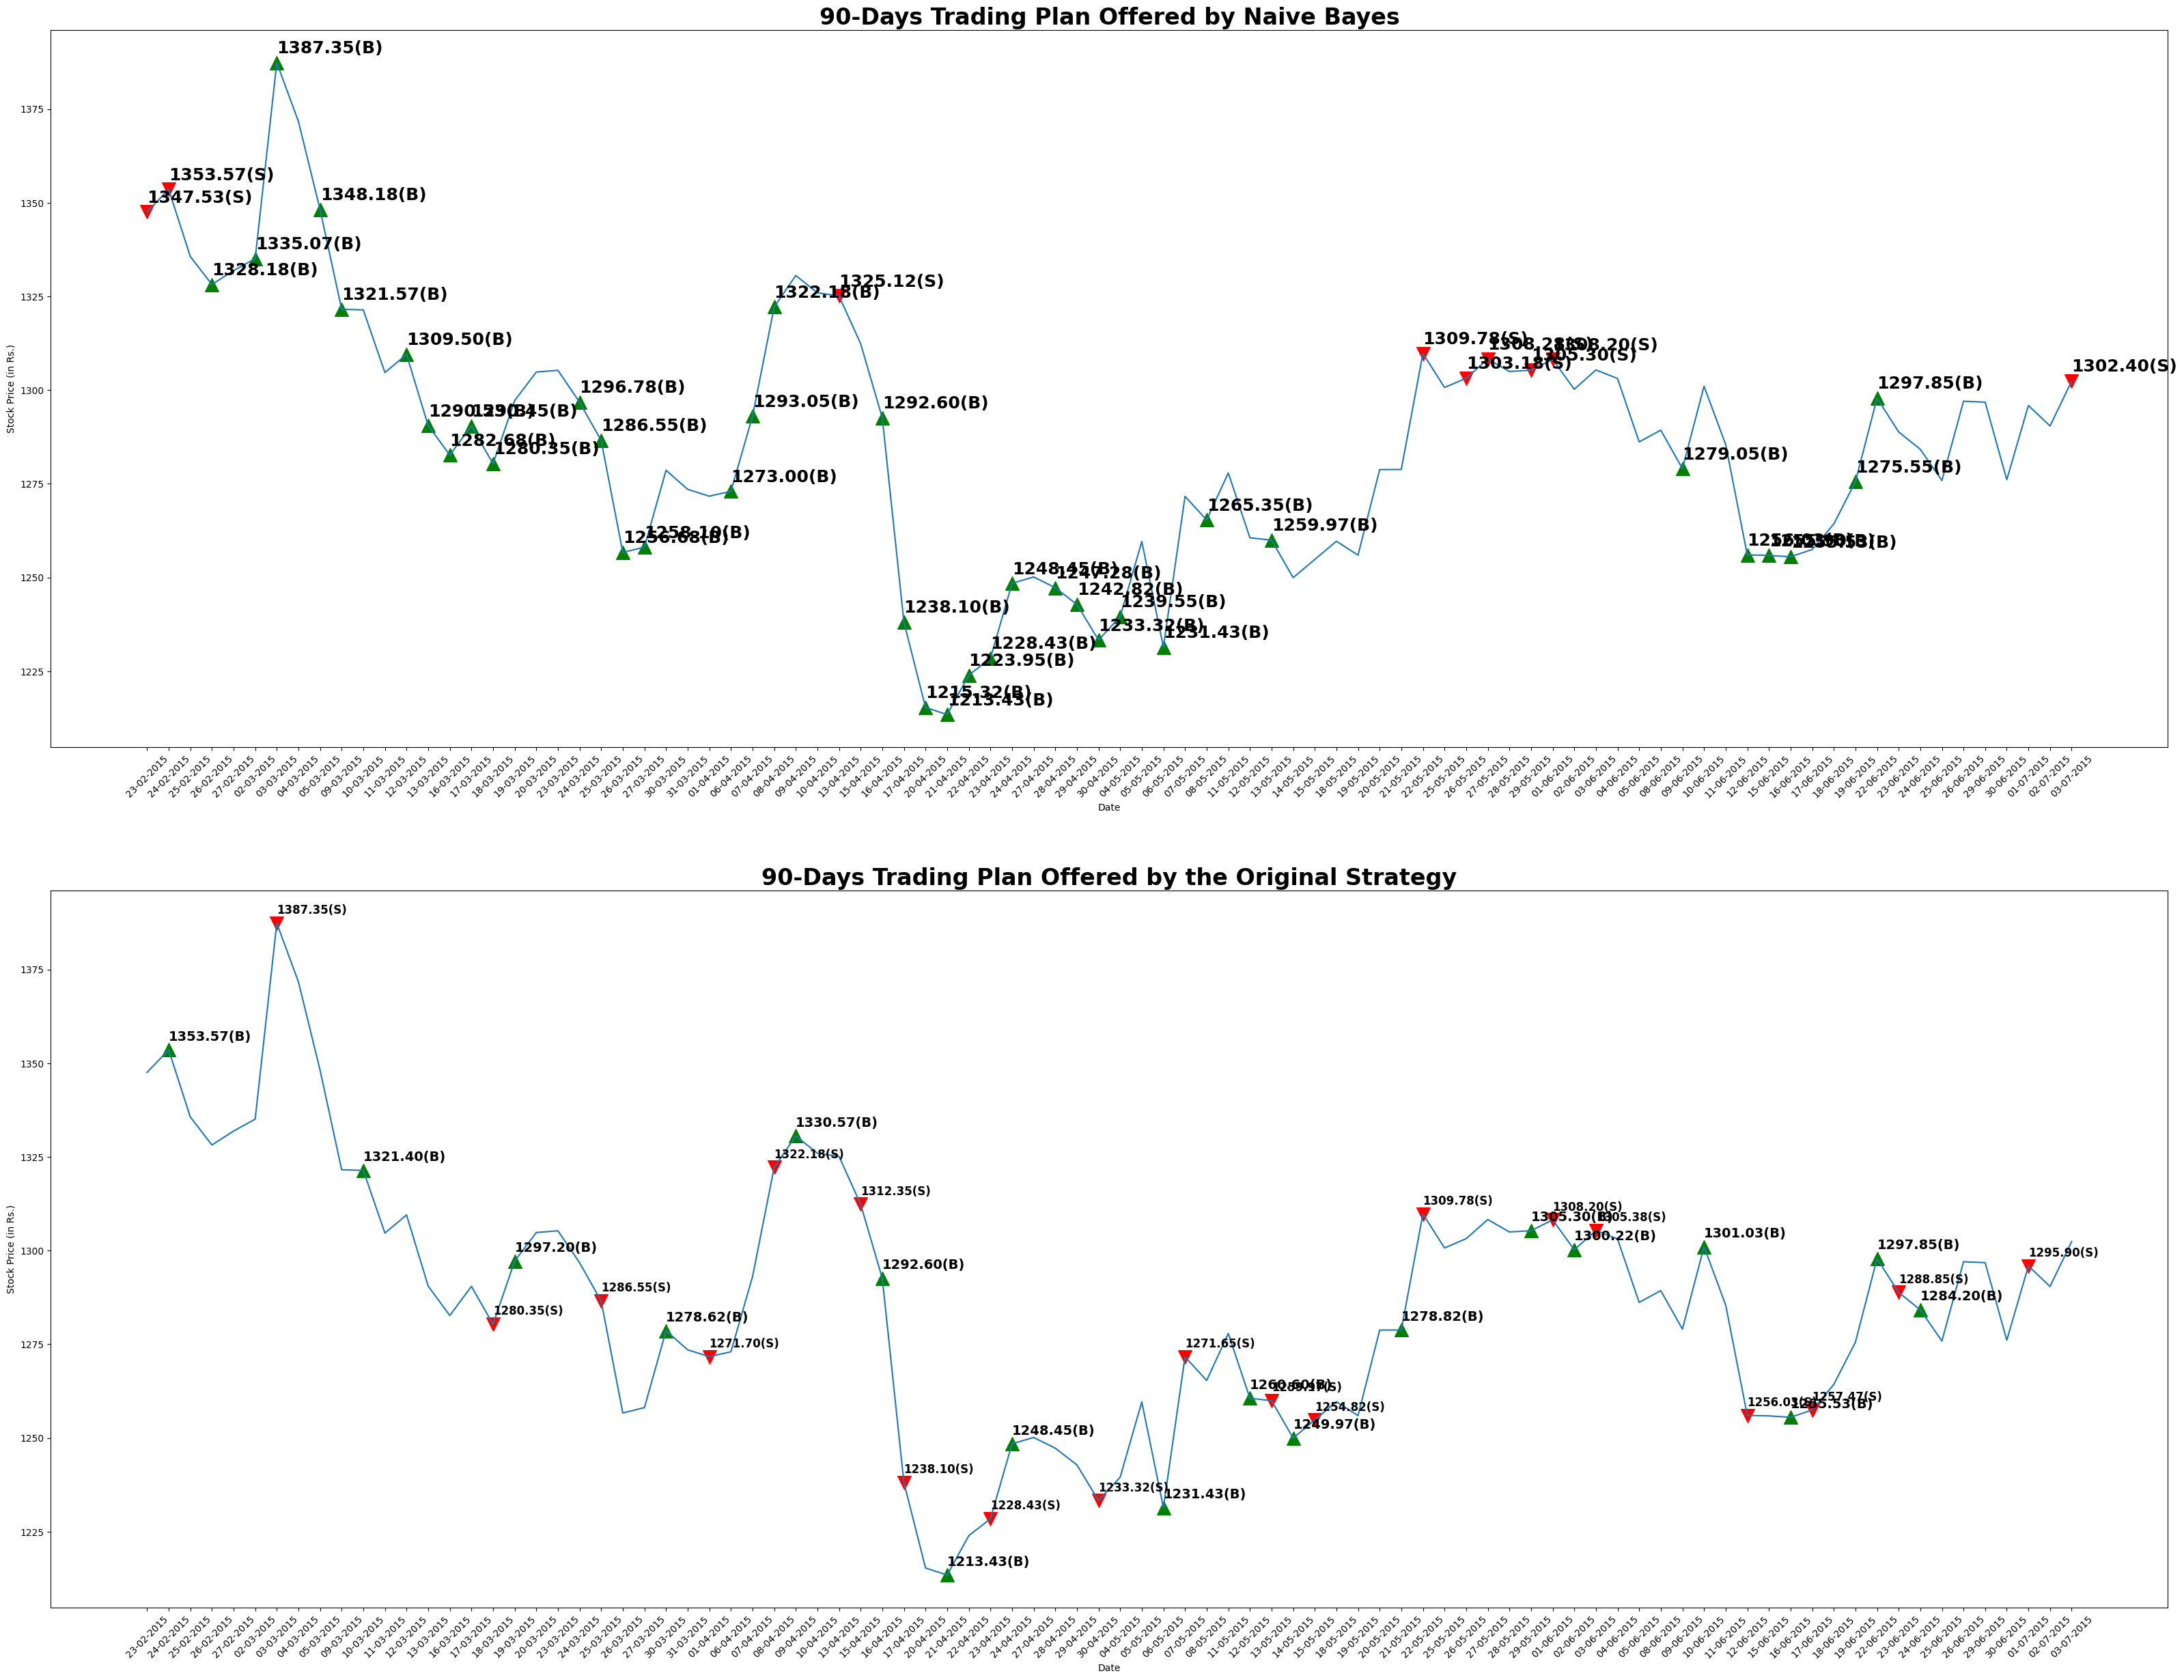

In [5]:
gnb = GaussianNB()
naiveBayes(gnb)

Part 2: Bernoulli Naive Bayes

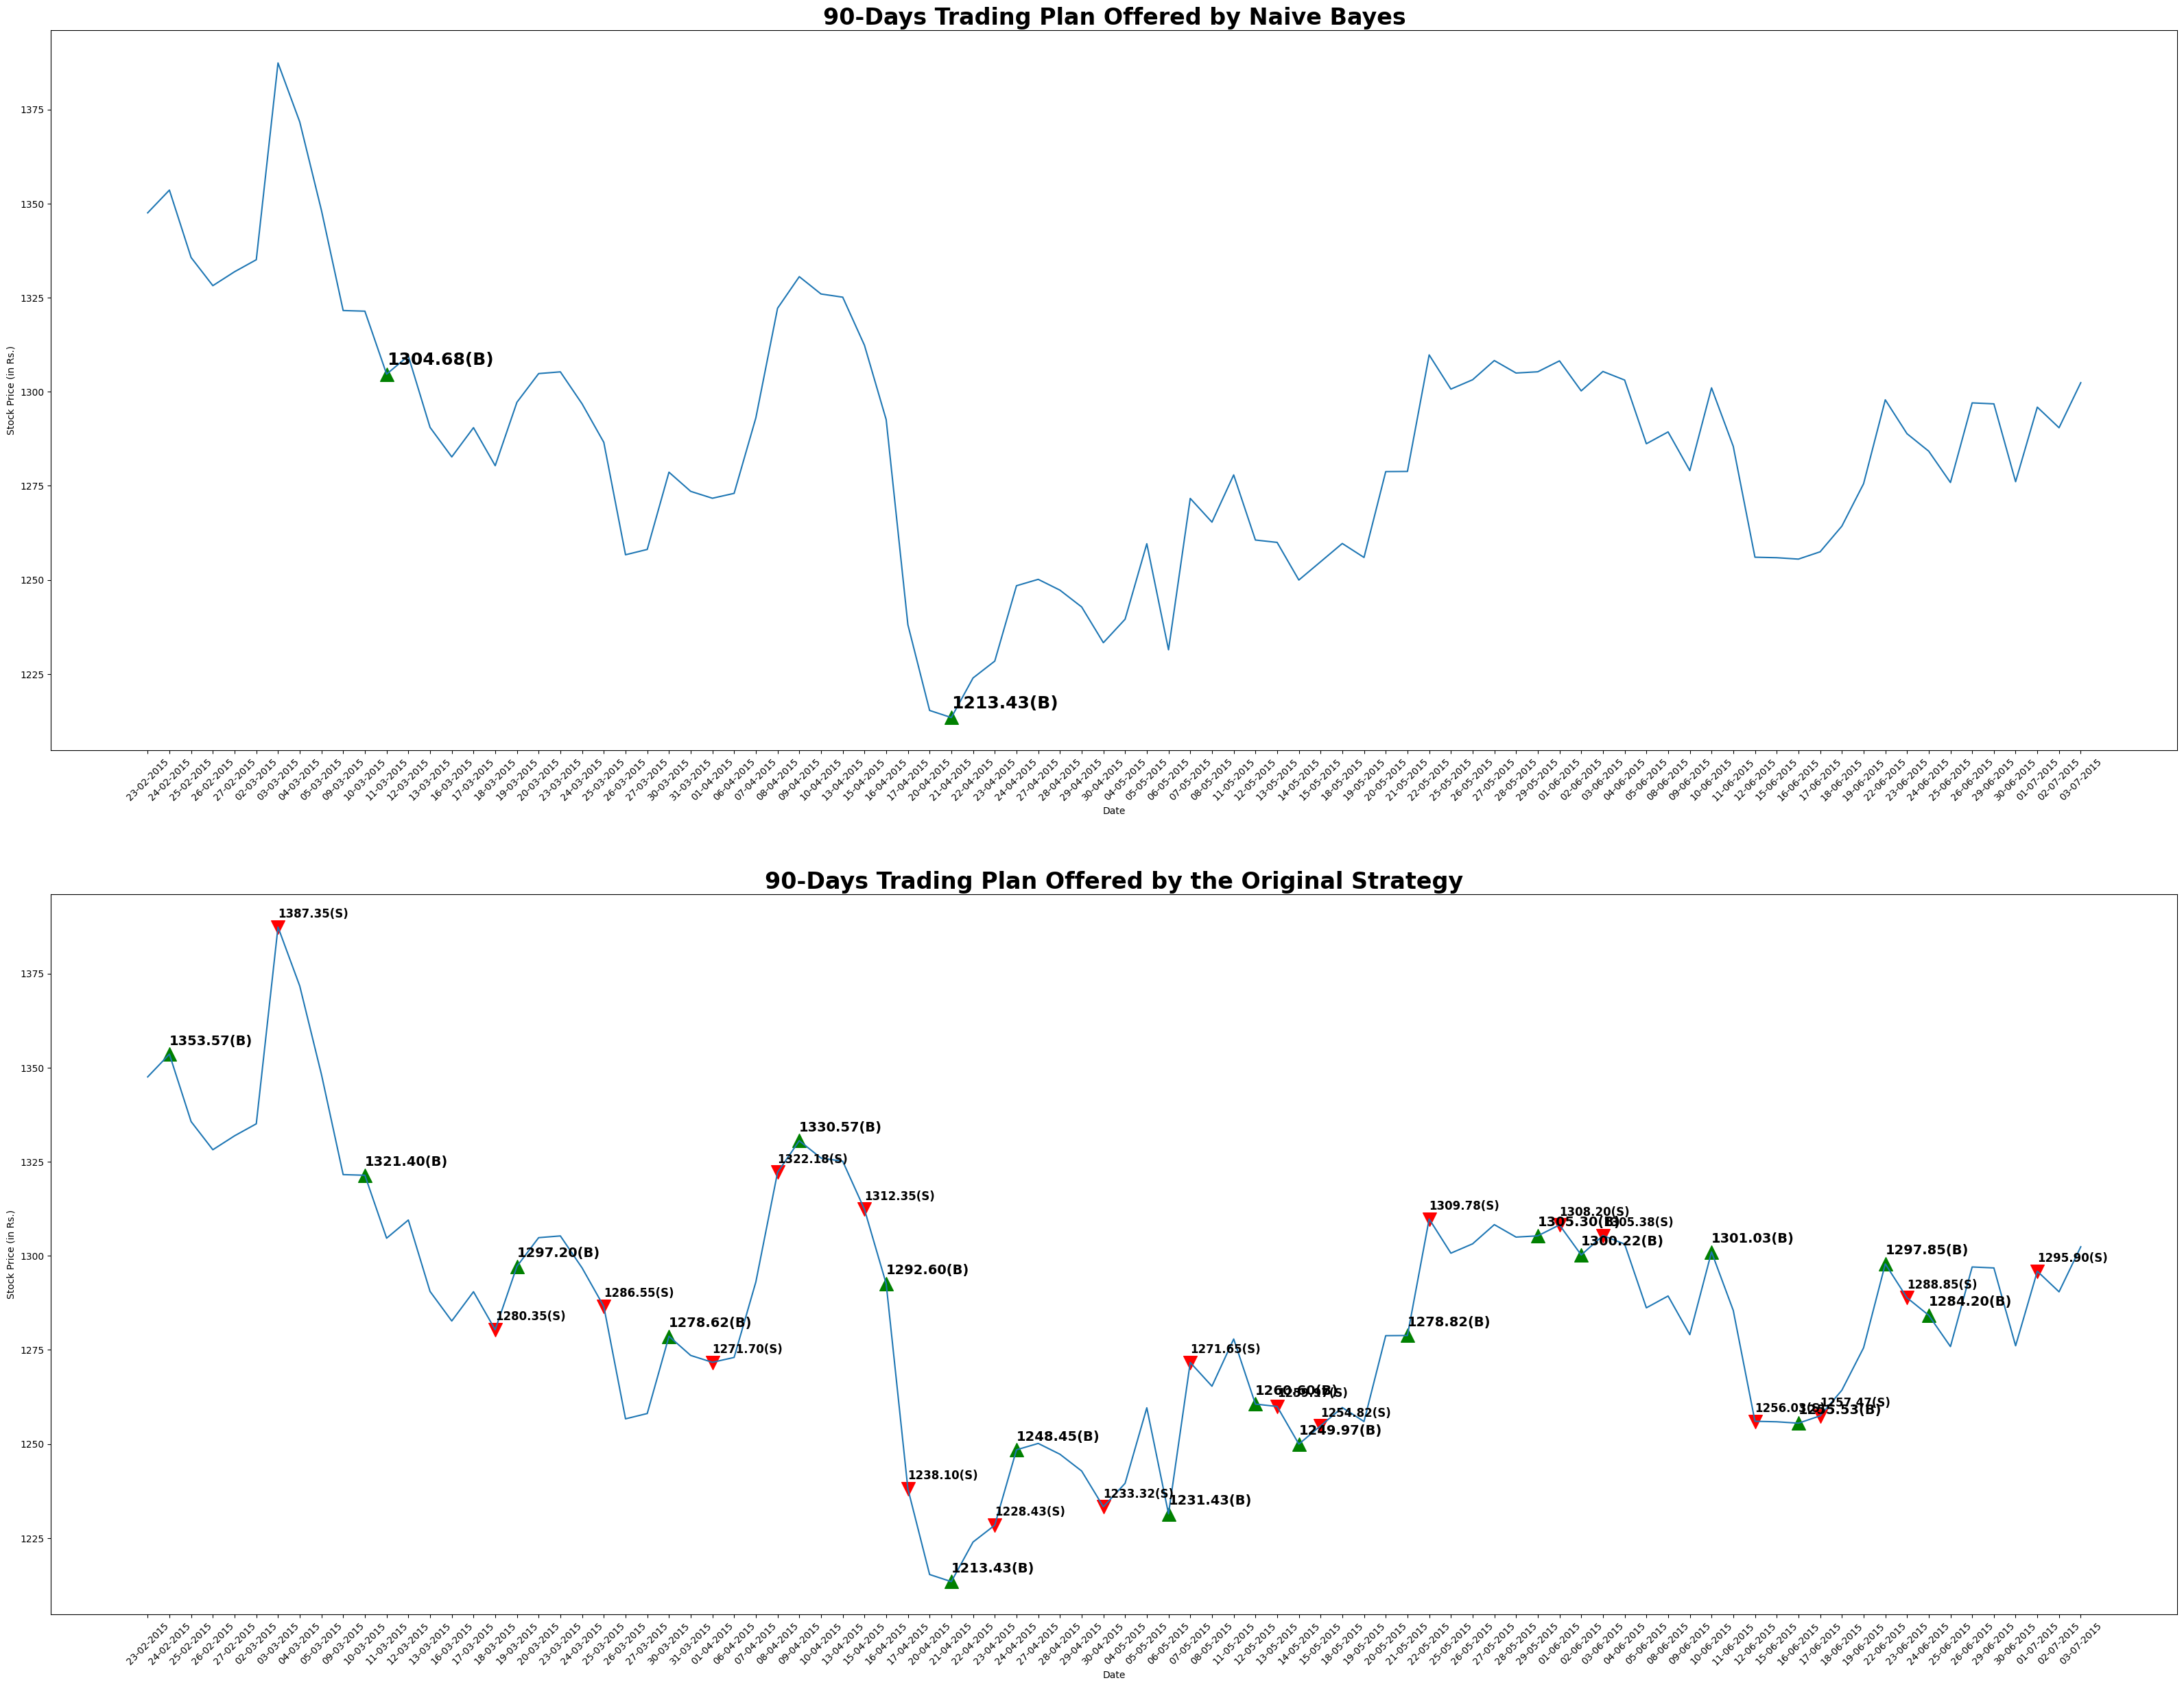

In [6]:
bnb = BernoulliNB()
naiveBayes(bnb)

Part 3: Complement Naive Bayes

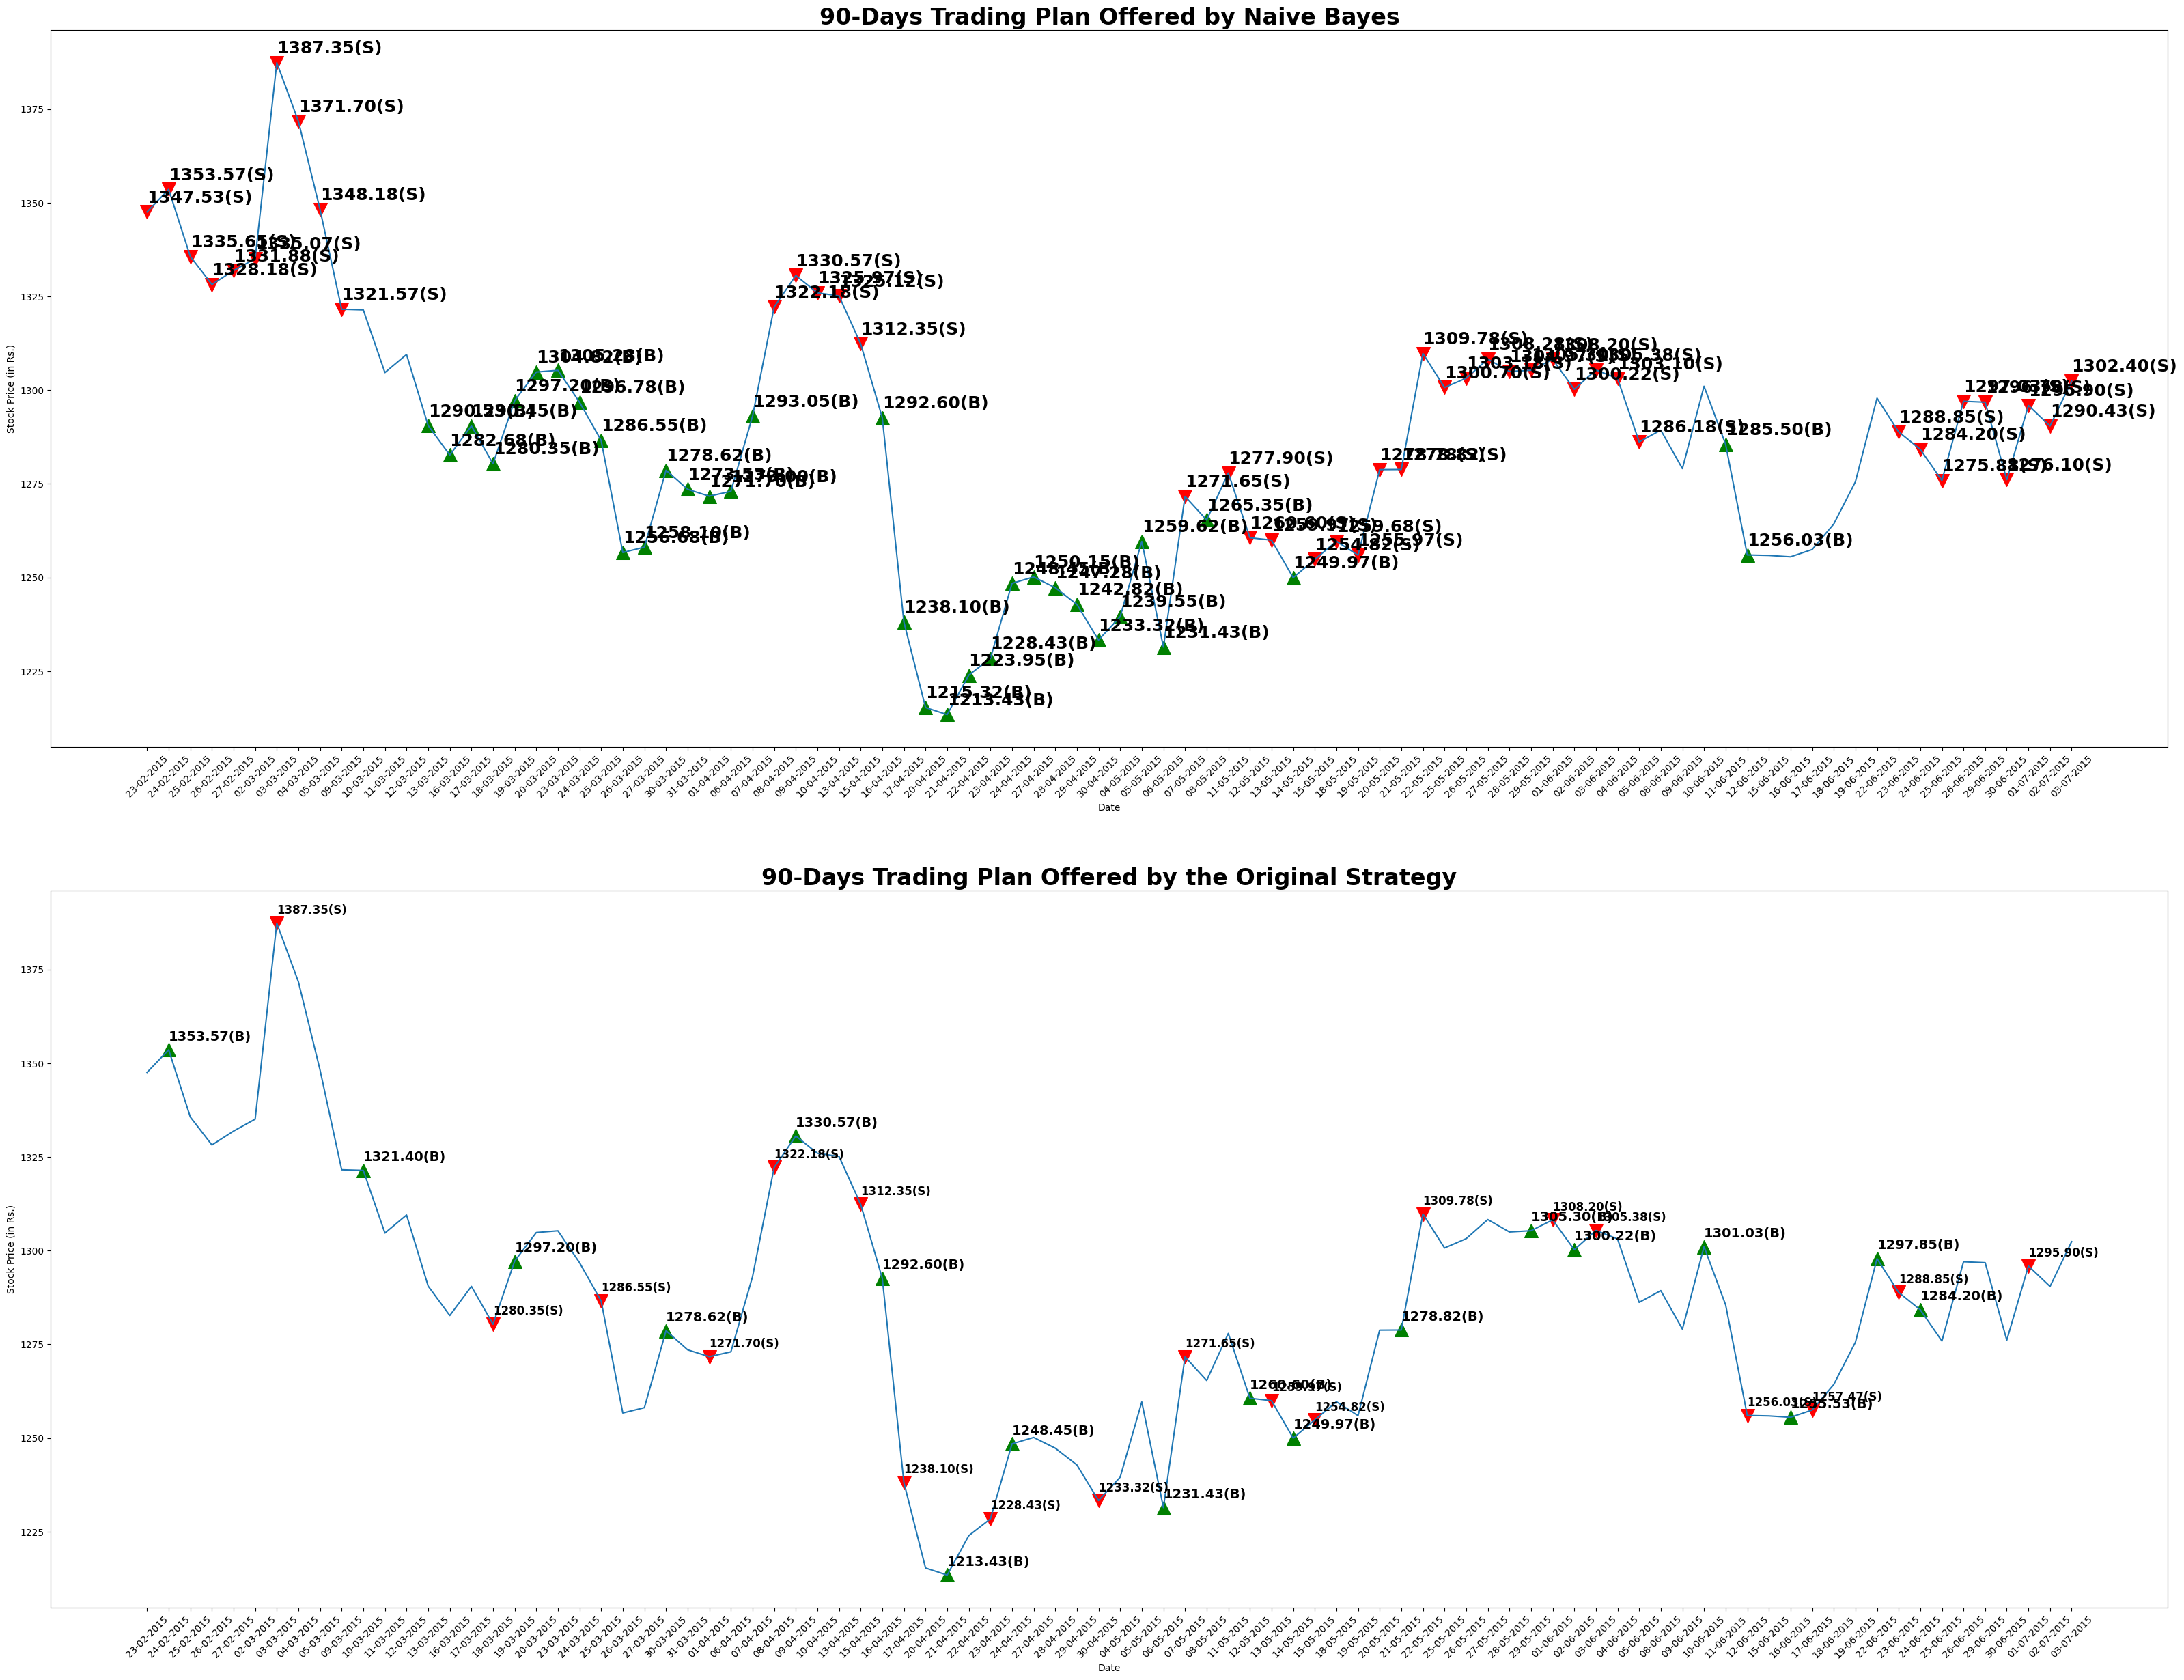

In [7]:
cnb = Pipeline([('Normalizing', MinMaxScaler()), ('ComplementNB', ComplementNB())])
naiveBayes(cnb)

Part 4: Multinomial naive Bayes

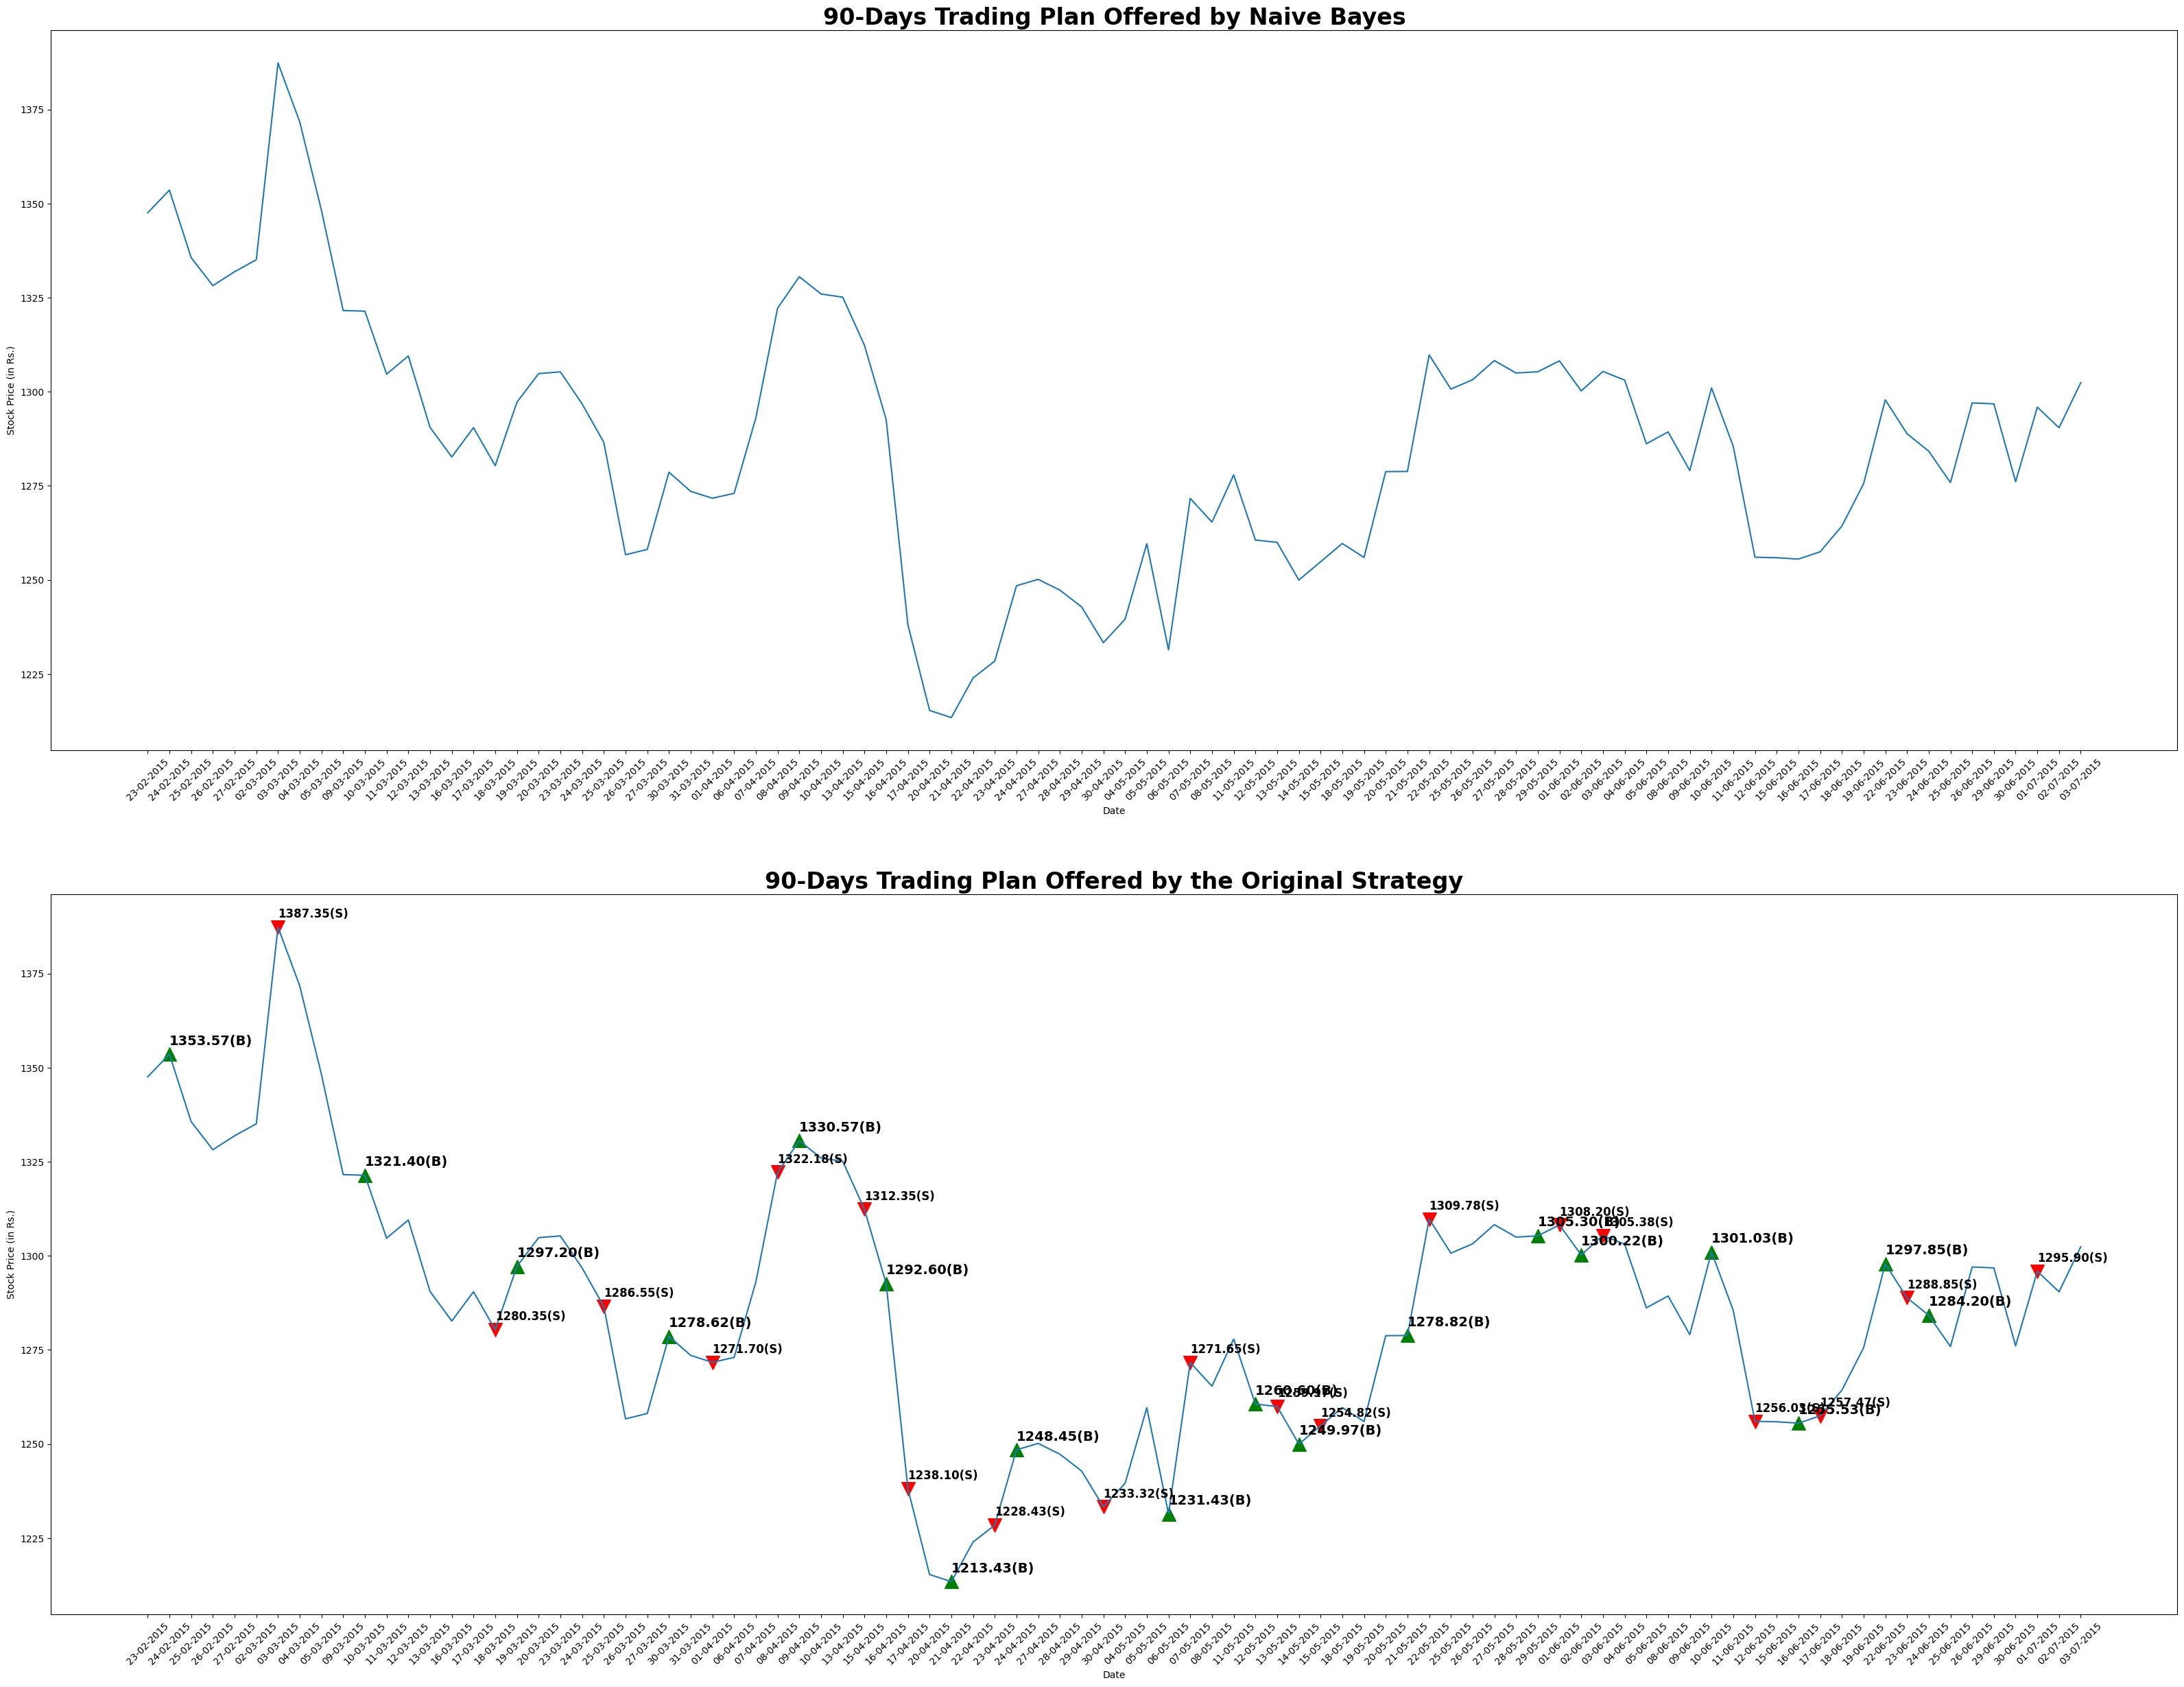

In [8]:
mnb = Pipeline([('Normalizing', MinMaxScaler()), ('MultinomialNB', MultinomialNB())])
naiveBayes(mnb)

In [9]:
# def NaiveBayesFunc(nb):
#     nb.fit(X_Train, Y_Train)
#     predictY = nb.predict(X_Test)
#     accuracy = metrics.accuracy_score(Y_Test, predictY)*100
#     precision = metrics.precision_score(Y_Test, predictY, average= 'micro')*100
#     recall = metrics.recall_score(Y_Test, predictY, average= 'micro')*100
#     return accuracy, precision, recall

# gnb = GaussianNB()
# # mnb = MultinomialNB()
# # cnb = ComplementNB()
# bnb = BernoulliNB()
# headings = ["Naive Bayes", "Accuracy", "Precision", "Recall"]
# tyepOfBayes = ["Gaussian", "Bernoulli"]
# bayes = [gnb, bnb]
# table = []
# for i in range(0, 2):
#     scores = NaiveBayesFunc(bayes[i])
#     scores = [tyepOfBayes[i], scores[0], scores[1], scores[2]]
#     table.append(scores)
# print(tabulate(table, headers=headings, tablefmt='grid'))